In [ ]:
Dataset Preparation:
    The first step involved loading the dataset and converting the date column into a datetime format. 
This allowed us to set the date as the index and ensure that all time-based operations, such as plotting and forecasting,
are aligned correctly. Only the relevant service type columns were selected for forecasting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
data = pd.read_csv('C:\\Users\\Dell\\Downloads\\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

In [ ]:
Choosing the Forecasting Model:
        For forecasting, we selected the SARIMA model,
        which is suitable for time series data with both trend and seasonality.
        The weekly pattern in passenger counts, especially for school and peak hour traffic,
        justified the inclusion of a seasonal component. 
        SARIMA allows capturing these recurring patterns while also accounting for overall trends in the data.

In [5]:
def sarima_forecast(series, steps=7):
    model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast


In [9]:
columns = ['Local Route', 'Rapid Route', 'Peak Hours', 'School', 'Other']

TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

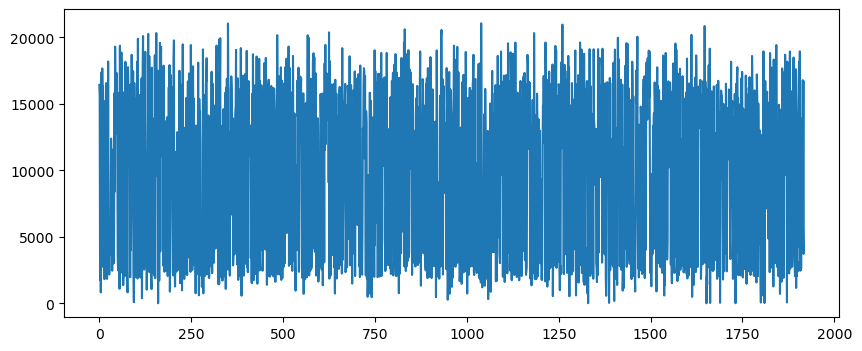

In [10]:
forecast_results = pd.DataFrame()

for col in columns:
    series = data[col]
    forecast = sarima_forecast(series)
    forecast_results[col + ' Forecast'] = forecast.values
    

    plt.figure(figsize=(10,4))
    plt.plot(series, label='Historical')
    plt.plot(pd.date_range(series.index[-1]+pd.Timedelta(days=1), periods=7), forecast, color='red', label='7-Day Forecast')
    plt.title(f'7-Day Forecast - {col}')
    plt.legend()
    plt.show()


In [ ]:
    We applied the SARIMA model individually to each service type: Local Route, Rapid Route, Peak Hours, School, and Other.
    This approach ensures that unique patterns and trends in each category are properly modeled.
    Each model was used to forecast the next 7 days, providing a short-term outlook on expected passenger counts.

In [11]:
def sarima_forecast(series, steps=7):
    model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast


TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

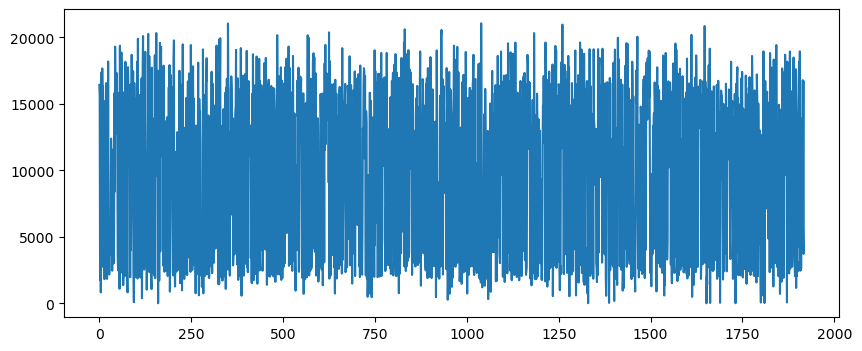

In [12]:
forecast_results = pd.DataFrame()

for col in columns:
    series = data[col]
    forecast = sarima_forecast(series)
    

    forecast_results[col + ' Forecast'] = forecast.values
    
    
    plt.figure(figsize=(10,4))
    plt.plot(series, label='Historical')
    plt.plot(pd.date_range(series.index[-1]+pd.Timedelta(days=1), periods=7), forecast, color='red', label='7-Day Forecast')
    plt.title(f'7-Day Forecast - {col}')
    plt.legend()
    plt.show()

In [ ]:
For clarity, historical passenger counts were plotted alongside the 7-day forecast. 
The plots help in comparing predicted values with historical trends and 
make it easier to interpret peaks, troughs, and overall movement in passenger traffic for each service type.

In [ ]:
Finally:
    Finally, the 7-day forecasts for all service types were consolidated into a single table and exported to CSV. 
    This allows for further analysis, comparison, or integration into operational planning for public transport services.